In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [4]:
nan_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
for feature in nan_feature:
    mean=dataset[feature].isnull().mean()
    mean=np.round(mean,4)
    print('{} has {}% null values'.format(feature,mean))

Age has 0.1987% null values
Cabin has 0.771% null values
Embarked has 0.0022% null values


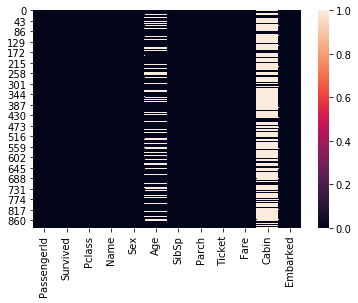

In [5]:
sns.heatmap(dataset.isnull())

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(dataset.shape)

(891, 12)


0    714
1    177
Name: Age, dtype: int64


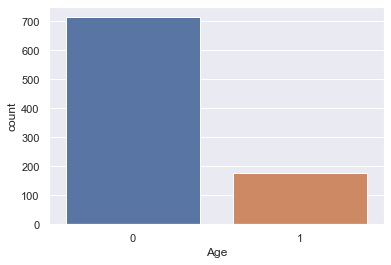

1    687
0    204
Name: Cabin, dtype: int64


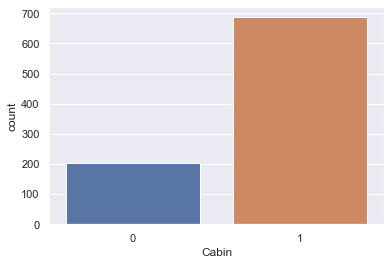

0    889
1      2
Name: Embarked, dtype: int64


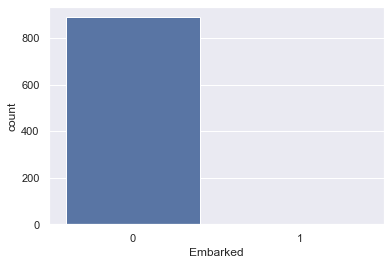

In [8]:
data=dataset.copy()
for feature in nan_feature:
    data[feature]=np.where(data[feature].isnull(),1,0)
    print(data[feature].value_counts())
    sns.set(style='darkgrid')
    sns.countplot(x=feature,data=data)
    plt.show()

male      577
female    314
Name: Sex, dtype: int64


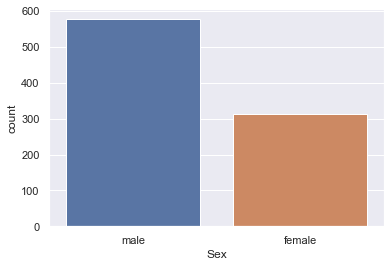

In [9]:
print(dataset['Sex'].value_counts())
sns.countplot(x='Sex',data=dataset)
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


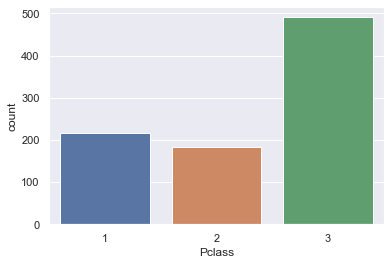

In [10]:
print(dataset['Pclass'].value_counts())
sns.countplot(x='Pclass',data=dataset)
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


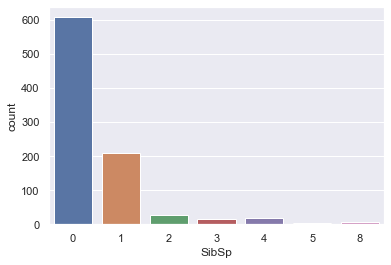

In [11]:
print(dataset['SibSp'].value_counts())
sns.countplot(x='SibSp',data=dataset)
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


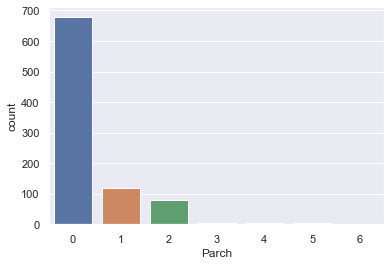

In [12]:
print(dataset['Parch'].value_counts())
sns.countplot(x='Parch',data=dataset)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


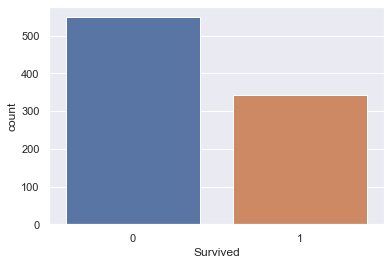

In [13]:
print(dataset['Survived'].value_counts())
sns.countplot(x='Survived',data=dataset)
plt.show()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


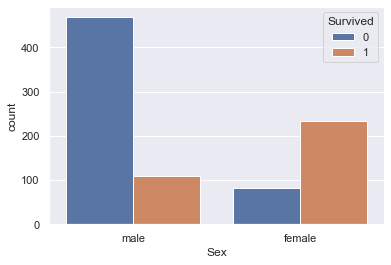

In [14]:
print(dataset.groupby('Sex')['Survived'].value_counts())
sns.countplot(x='Sex',hue='Survived',data=dataset)
plt.show()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64


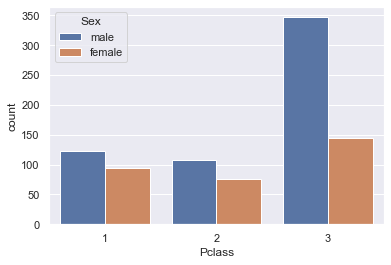

In [15]:
print(dataset.groupby('Pclass')['Sex'].value_counts())
sns.countplot(x='Pclass',hue='Sex',data=dataset)
plt.show()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


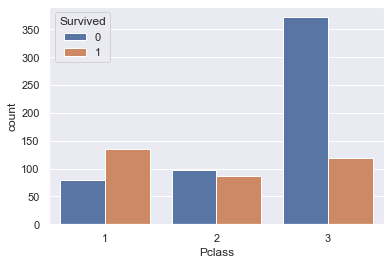

In [16]:
print(dataset.groupby('Pclass')['Survived'].value_counts())
sns.countplot(x='Pclass',hue='Survived',data=dataset)
plt.show()

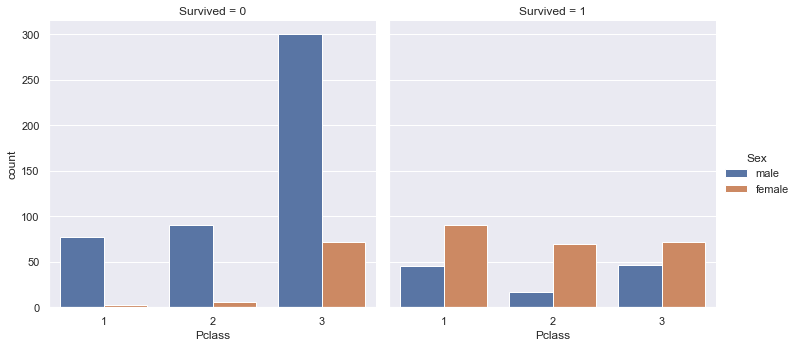

In [17]:
sns.catplot(x='Pclass',hue='Sex', col='Survived', data=data,kind='count')

In [18]:
dataset.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

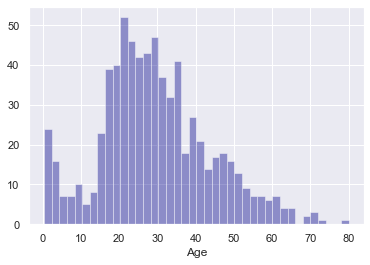

In [19]:
sns.distplot(dataset['Age'].dropna(),kde=False,bins=40,color='darkblue')


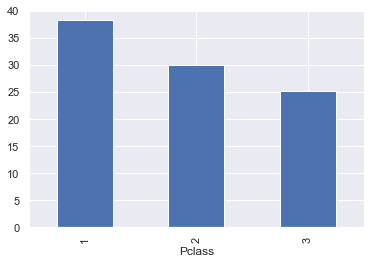

In [20]:
dataset.groupby('Pclass')['Age'].mean().plot.bar()
plt.show()

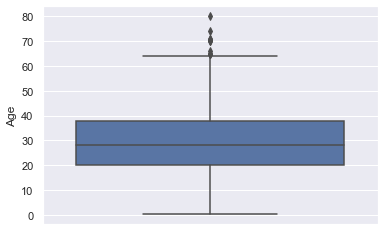

In [21]:
#checking outliers
sns.boxplot(y=dataset['Age'])

# Feature Engineering

First we handle the missing values. As we see there are three features that have missing values. Age has 20% null values and Embarked has also very very less null values while cabin has 77% null values. So we fill the missing values only in Age and Embarked feature and we drop the Cabin feature because it has more then 50% data missing.

In [22]:
training_data=dataset.drop('Cabin',axis=1)

In [23]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
def fill_age(cols):
    pclass=cols[0]
    age=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        if pclass==2:
            return 30
        if pclass==3:
            return 25
    else:
        return age
    
training_data['Age']=dataset[['Pclass','Age']].apply(fill_age,axis=1)
print(training_data['Age'].isnull().sum()>1)

False


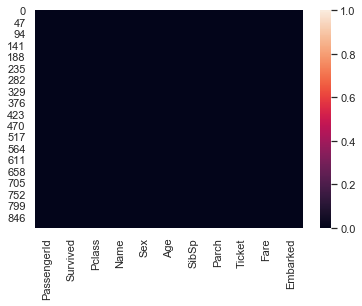

In [25]:
sns.heatmap(training_data.isnull())

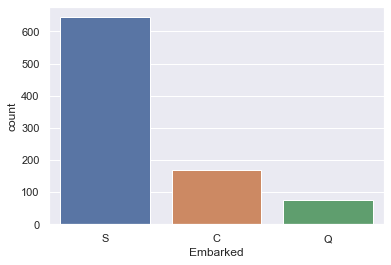

In [26]:
training_data['Embarked'].value_counts()
sns.countplot(x='Embarked',data=training_data)
plt.show()

In [27]:
training_data['Embarked']=training_data['Embarked'].fillna('S')

In [28]:
training_data['Embarked'].isnull().sum()>1

False

In [29]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now we apply one hot encoding technique on categorical variables to convert them in numerical.

In [30]:
OHE=pd.get_dummies(training_data['Sex'])
OHE

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [31]:
training_data=pd.concat([training_data,OHE],sort=False,axis=1)

In [32]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [33]:
OHE_emb=pd.get_dummies(training_data['Embarked'])
OHE_emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [34]:
training_data=pd.concat([training_data,OHE_emb],sort=False,axis=1)

In [35]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


Now we drop unnecessary columns

In [36]:
training_data=training_data.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1)
training_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [37]:
x_train=training_data.iloc[:,1:]
y_train=training_data.iloc[:,0]

In [38]:
print(x_train.head())
cols=[cols for cols in x_train.columns]
print(cols)

   Pclass   Age  SibSp  Parch     Fare  female  male  C  Q  S
0       3  22.0      1      0   7.2500       0     1  0  0  1
1       1  38.0      1      0  71.2833       1     0  1  0  0
2       3  26.0      0      0   7.9250       1     0  0  0  1
3       1  35.0      1      0  53.1000       1     0  0  0  1
4       3  35.0      0      0   8.0500       0     1  0  0  1
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 'C', 'Q', 'S']


In [39]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(x_train[['Age',"Fare"]])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
x_t=scale.transform(x_train[['Age',"Fare"]])

In [47]:
x_t
cols=['Age','Fare']

In [48]:
X=pd.DataFrame(x_t,columns=cols)

In [49]:
X.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [50]:
x_train=x_train.drop(['Age','Fare'],axis=1)
x_train.head()

,Pclass,SibSp,Parch,female,male,C,Q,S
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


In [51]:
x_train=pd.concat([X,x_train],sort=False,axis=1)
x_train.head()

,Age,Fare,Pclass,SibSp,Parch,female,male,C,Q,S
0,0.271174,0.014151,3,1,0,0,1,0,0,1
1,0.472229,0.139136,1,1,0,1,0,1,0,0
2,0.321438,0.015469,3,0,0,1,0,0,0,1
3,0.434531,0.103644,1,1,0,1,0,0,0,1
4,0.434531,0.015713,3,0,0,0,1,0,0,1


# Test data

In [52]:
x_test=pd.read_csv('test.csv')
x_test.shape

(418, 11)

In [53]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


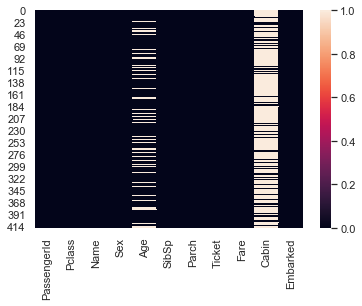

In [54]:
sns.heatmap(x_test.isnull())

In [55]:
x_test=x_test.drop('Cabin',axis=1)
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [56]:
def fill_age(cols):
    pclass=cols[0]
    age=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        if pclass==2:
            return 30
        if pclass==3:
            return 25
    else:
        return age
    
x_test['Age']=x_test[['Pclass','Age']].apply(fill_age,axis=1)
print(x_test['Age'].isnull().sum()>1)
print(x_test.shape)

False
(418, 10)


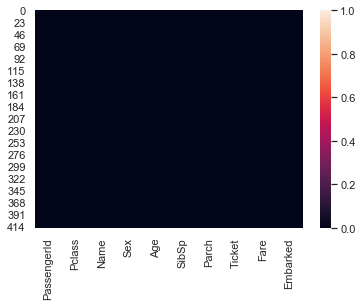

In [57]:
sns.heatmap(x_test.isnull())

In [58]:
x_test['Embarked']=x_test['Embarked'].fillna('S')
print(x_test['Age'].isnull().sum()>1)

False


In [59]:
t_OHE=pd.get_dummies(x_test['Sex'])
t_OHE

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [60]:
x_test=pd.concat([x_test,t_OHE],sort=False,axis=1)
x_test.shape

(418, 12)

In [61]:
t_OHE_emb=pd.get_dummies(x_test['Embarked'])
t_OHE_emb

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [62]:
x_test=pd.concat([x_test,t_OHE_emb],sort=False,axis=1)
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,0,0,0,1


In [63]:
x_test=x_test.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1)
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [64]:
x_test.tail()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
413,3,25.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,25.0,0,0,8.0500,0,1,0,0,1
417,3,25.0,1,1,22.3583,0,1,1,0,0


In [65]:
y_test=pd.read_csv('gender_submission.csv')
y_test=y_test.drop(['PassengerId'],axis=1)
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [66]:
print(x_test.shape)
print(y_test.shape)

(418, 10)
(418, 1)


In [67]:
from sklearn.preprocessing import MinMaxScaler
t_scale=MinMaxScaler()
t_scale.fit(x_test[['Age','Fare']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [68]:
x_t=t_scale.transform(x_test[['Age','Fare']])

In [69]:
x_t=pd.DataFrame(x_t,columns=cols)

In [70]:
x_test=x_test.drop(['Age','Fare'],axis=1)
x_test.head()

,Pclass,SibSp,Parch,female,male,C,Q,S
0,3,0,0,0,1,0,1,0
1,3,1,0,1,0,0,0,1
2,2,0,0,0,1,0,1,0
3,3,0,0,0,1,0,0,1
4,3,1,1,1,0,0,0,1


In [71]:
x_test=pd.concat([x_t,x_test],sort=False,axis=1)
x_test.head()

,Age,Fare,Pclass,SibSp,Parch,female,male,C,Q,S
0,0.452723,0.015282,3,0,0,0,1,0,1,0
1,0.617566,0.013663,3,1,0,1,0,0,0,1
2,0.815377,0.018909,2,0,0,0,1,0,1,0
3,0.353818,0.016908,3,0,0,0,1,0,0,1
4,0.287881,0.023984,3,1,1,1,0,0,0,1


In [98]:
print(np.where(np.isnan(x_test)))
m=x_test['Fare'].dropna().mean()
x_test['Fare']=x_test['Fare'].fillna(m)

(array([], dtype=int64), array([], dtype=int64))


In [97]:
np.where(np.isnan(x_test))

(array([], dtype=int64), array([], dtype=int64))

# Modeling 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [101]:
y_hat=neigh.predict(x_test)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[245  21]
 [ 39 113]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       266
           1       0.84      0.74      0.79       152

    accuracy                           0.86       418
   macro avg       0.85      0.83      0.84       418
weighted avg       0.86      0.86      0.85       418



In [104]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_hat=reg.predict(x_test)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[253  13]
 [ 10 142]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418

